In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

from preprocessing import load_and_split

In [4]:
# data = pd.read_csv("data/training_data_ht2025.csv")
# print(data.shape)
# data.head()
# 
X_train, X_test, y_train, y_test = load_and_split("data/training_data_ht2025.csv")

In [ ]:
# data['target'] = data['increase_stock'].apply(lambda x: 1 if x == "high_bike_demand" else 0)
# data = data.drop(columns=['snow'])

In [ ]:
# categorical_feats = ['hour_of_day', 'day_of_week', 'month', 'holiday', 
#                      'weekday', 'summertime', 'increase_stock']
# numerical_feats = ['temp', 'dew', 'humidity', 'precip', 'snow_depth', 
#                    'windspeed', 'cloudcover', 'visibility']

In [ ]:
# X = data.drop(['increase_stock', 'target'], axis=1) # dropping target and helper columns
# y = data['target']

In [ ]:
# Split the data: 80% Training, 20% Testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

# print(f"Training shape: {X_train.shape}")
# print(f"Testing shape: {X_test.shape}")

Training shape: (1280, 14)
Testing shape: (320, 14)


Decision Tree Accuracy: 0.83125

Classification Report:
                   precision    recall  f1-score   support

 low_bike_demand       0.89      0.91      0.90       262
high_bike_demand       0.54      0.47      0.50        58

        accuracy                           0.83       320
       macro avg       0.71      0.69      0.70       320
    weighted avg       0.82      0.83      0.83       320



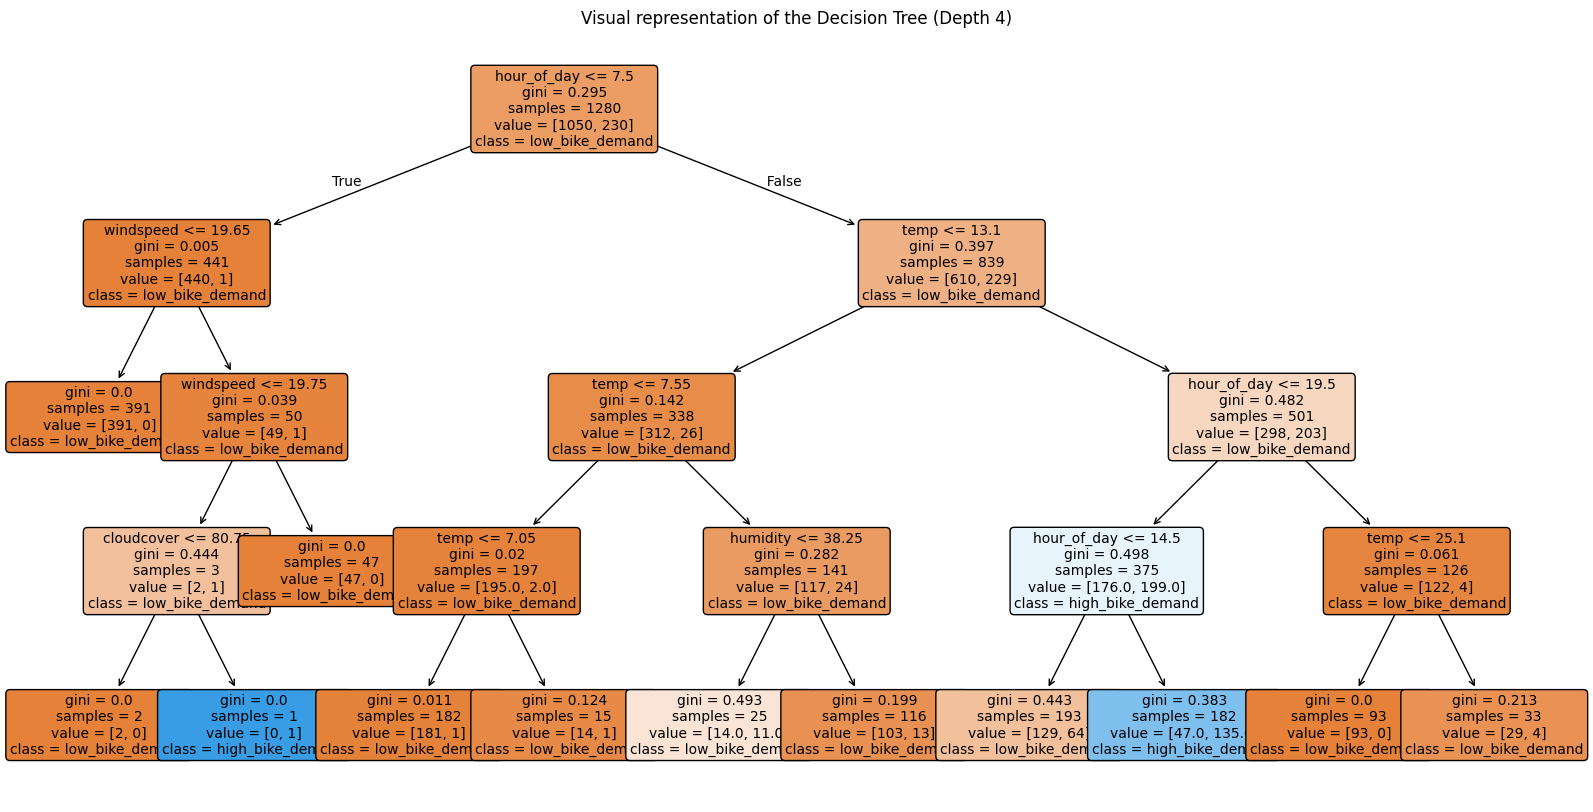

In [5]:
# Single regression tree
dt_model = DecisionTreeClassifier(random_state=23, max_depth=4) 
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=['low_bike_demand', 'high_bike_demand']))

# Visualization: Plotting the Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=X_train.columns,
          class_names=['low_bike_demand', 'high_bike_demand'],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Visual representation of the Decision Tree (Depth 4)")
plt.show()

ROC AUC: 0.8433798367991576


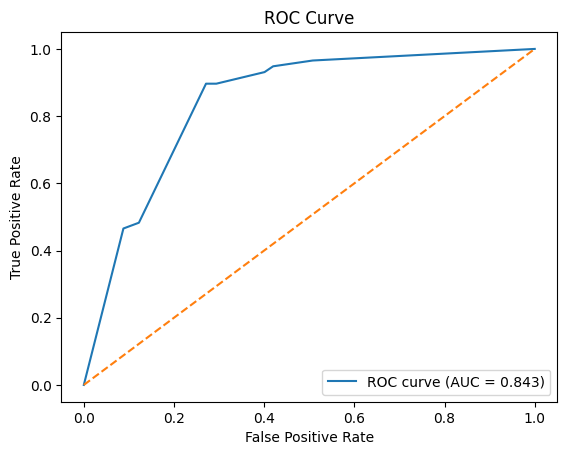

In [ ]:

from sklearn.metrics import roc_curve, auc

y_pred_proba_optimized = dt_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_optimized)

# Compute AUC
#
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# Plot
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for a single Decision Tree')
plt.legend()
plt.show()

Random Forest Accuracy: 0.88125

Classification Report:
                   precision    recall  f1-score   support

 low_bike_demand       0.91      0.94      0.93       262
high_bike_demand       0.70      0.60      0.65        58

        accuracy                           0.88       320
       macro avg       0.81      0.77      0.79       320
    weighted avg       0.88      0.88      0.88       320



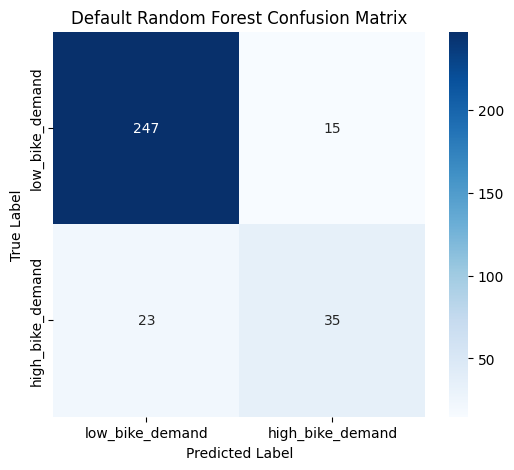

In [9]:
# Random Forest creates many trees (n_estimators=100) and averages them
rf_model = RandomForestClassifier(n_estimators=100, random_state=23)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=['low_bike_demand', 'high_bike_demand']))

# Visualization: Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['low_bike_demand', 'high_bike_demand'], yticklabels=['low_bike_demand', 'high_bike_demand'])
plt.title('Default Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

ROC AUC: 0.8907936299026059


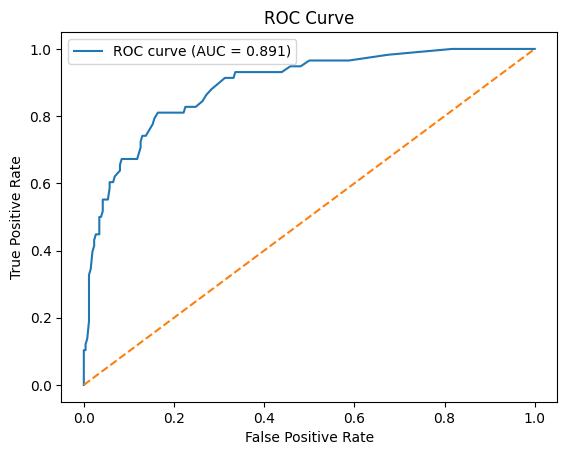

In [12]:

y_pred_proba_optimized = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_optimized)

# Compute AUC
#
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# Plot
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()